<a href="https://colab.research.google.com/github/LeVuPhuoc/AI-Robotics/blob/main/nhandien3nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import thư viện

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# 2. Lấy data và reshape

In [92]:
#get data
with open('data4.pickle', 'rb') as k:
  (x_train, y_train), (x_test, y_test) = pickle.load(k)

x_pre1 = x_train
x_pre2 = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_train.shape

(90, 3)


# 3. Tạo mô hình và train

In [93]:

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation = 'softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 37, 37, 128)      

In [94]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size=64, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 359ms/step - loss: 10.8599 - accuracy: 0.3889 - val_loss: 26.6524 - val_accuracy: 0.1143
Epoch 2/100
2/2 [==============================] - 0s 161ms/step - loss: 13.5712 - accuracy: 0.3000 - val_loss: 1.1446 - val_accuracy: 0.2857
Epoch 3/100
2/2 [==============================] - 0s 147ms/step - loss: 1.0918 - accuracy: 0.3333 - val_loss: 0.9463 - val_accuracy: 0.2857
Epoch 4/100
2/2 [==============================] - 0s 150ms/step - loss: 1.0010 - accuracy: 0.4333 - val_loss: 0.9004 - val_accuracy: 0.8286
Epoch 5/100
2/2 [==============================] - 0s 156ms/step - loss: 0.9436 - accuracy: 0.5444 - val_loss: 0.6884 - val_accuracy: 0.8857
Epoch 6/100
2/2 [==============================] - 0s 146ms/step - loss: 0.7662 - accuracy: 0.6667 - val_loss: 0.4569 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 143ms/step - loss: 0.4740 - accuracy: 1.0000 - val_loss: 0.1200 - val_accuracy: 1.0000
Epoch 8/100
2/2 [=====

# 4. Vẽ đồ thị

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


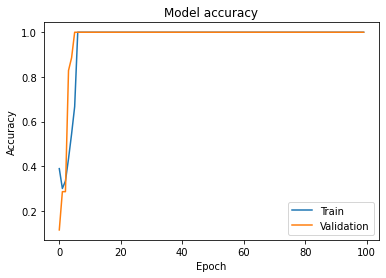

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

# 5. Kiểm tra lại

(150, 150, 3)
[0]


'Người trong ảnh là Phước'

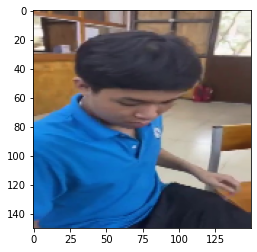

In [96]:
test =1
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Người trong ảnh là Phước', 'Người trong ảnh là Thành', 'Người trong ảnh là Đức']
Label[pred[0]]


(150, 150, 3)
[1]


'Người trong ảnh là Thành'

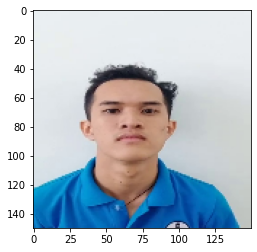

In [97]:
test =10
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Người trong ảnh là Phước', 'Người trong ảnh là Thành', 'Người trong ảnh là Đức']
Label[pred[0]]

(150, 150, 3)
[2]


'Người trong ảnh là Đức'

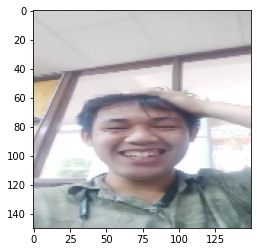

In [98]:
test =33
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Người trong ảnh là Phước', 'Người trong ảnh là Thành', 'Người trong ảnh là Đức']
Label[pred[0]]

In [99]:
model.save('nhandien3nguoi.h5')